## Course-End Project [Capstone Project 2]

### Project Domain: E-commerce 
![alt text](image.jpg)


Introduction to the Project:

The course-end project analyzes sentiments expressed in over 34,000 reviews for Amazon brand products within the e-commerce domain. The dataset contains attributes such as brand, categories, review titles, review text, and sentiment levels categorized into "Positive," "Negative," and "Neutral." The project aims to predict sentiment or satisfaction levels based on various features and review text.

Objectives of the Project:

●	Understand the sentiment expressed in consumer reviews.

●	Address class imbalance in sentiment categories. 

●	Implement classifiers and advanced techniques for sentiment analysis.

●	Evaluate model performance using appropriate metrics.

●	Compare traditional machine learning algorithms with neural network approaches.

●	Explore topic modeling techniques for clustering similar reviews.


> Importing necessary libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout,Bidirectional
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import missingno as msno



In [37]:
# Load data
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


## Exploratory Data Analysis (EDA):

In [39]:
# # Combine all training and validation data set for EDA
df = pd.concat([train_df,validation_df], ignore_index=True)


In [40]:
df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [41]:
df.isnull().sum()

Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          13
sentiment               0
dtype: int64

In [42]:
# Display basic statistics
print("Basic Statistics:")
df.describe(include='all')

Basic Statistics:


,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,5000,5000,5000,5000,5000,5000,4987,5000
unique,23,1,23,4,679,4385,3124,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,Bought this mostly as a backup.and to read a f...,Great tablet,Positive
freq,845,5000,797,3276,125,4,122,4686


Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          13
sentiment               0
dtype: int64


<Figure size 1000x600 with 0 Axes>

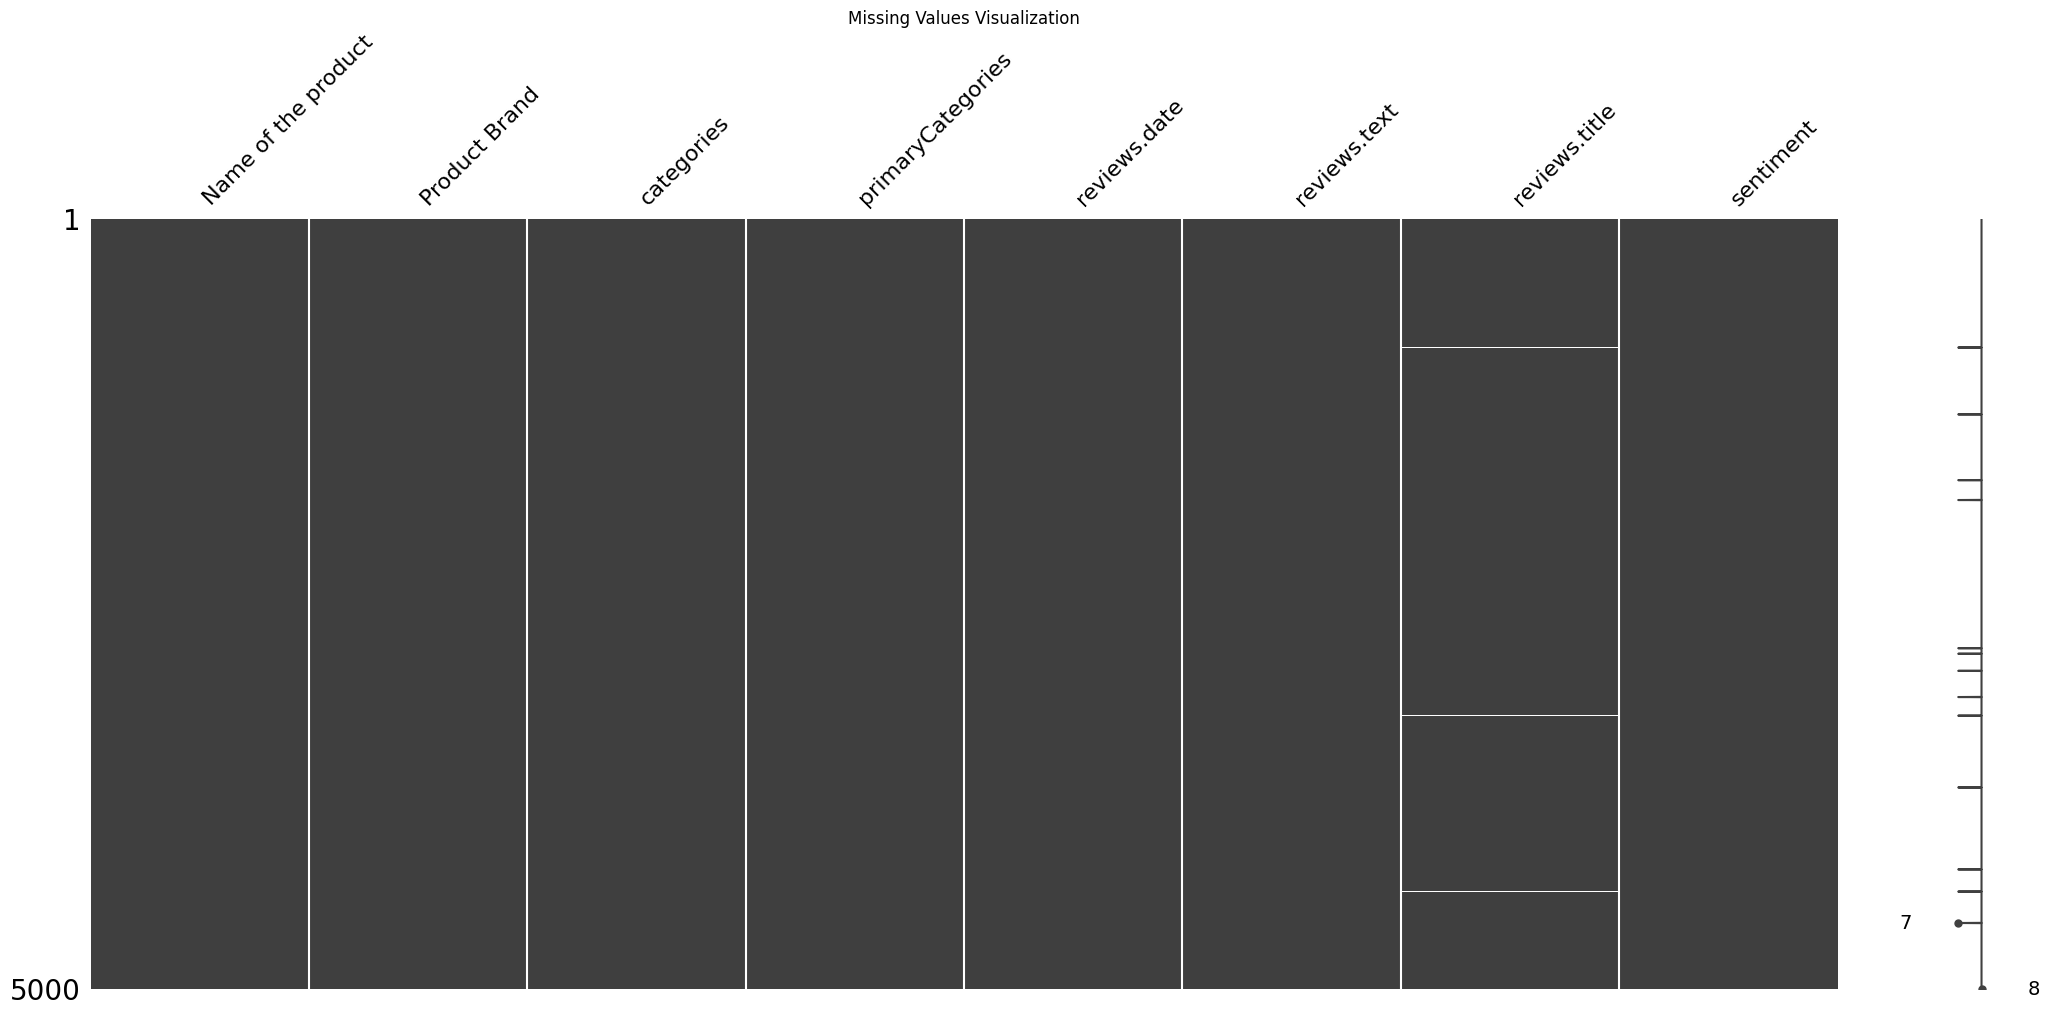

In [43]:
print(df.isnull().sum())
# Visualize missing values
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Missing Values Visualization')
plt.show()

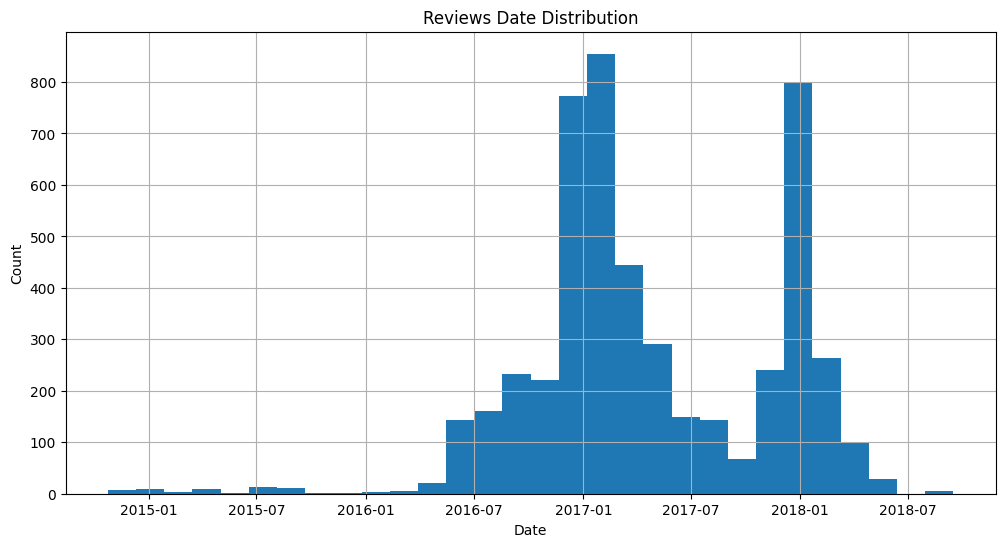

In [44]:
# Distribution of reviews date
plt.figure(figsize=(12, 6))
df['reviews.date'] = pd.to_datetime(df['reviews.date'])
df['reviews.date'].hist(bins=30)
plt.title('Reviews Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


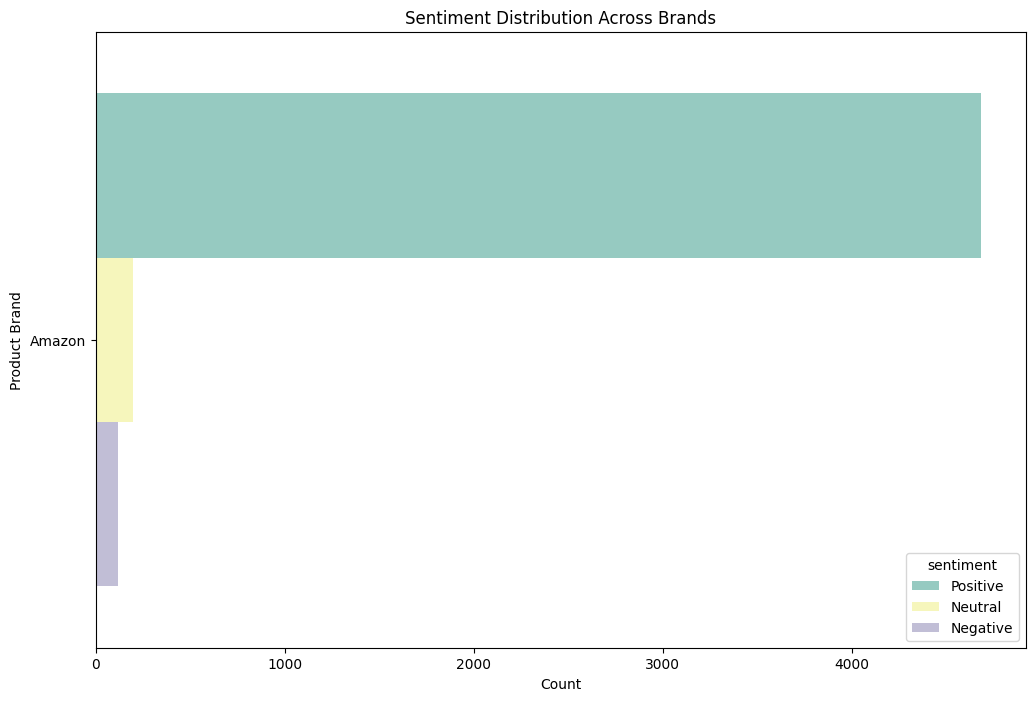

In [45]:
# Sentiment distribution across brands
plt.figure(figsize=(12, 8))
sns.countplot(y='Product Brand', hue='sentiment', data=df, palette='Set3', order=df['Product Brand'].value_counts().index)
plt.title('Sentiment Distribution Across Brands')
plt.xlabel('Count')
plt.ylabel('Product Brand')
plt.show()

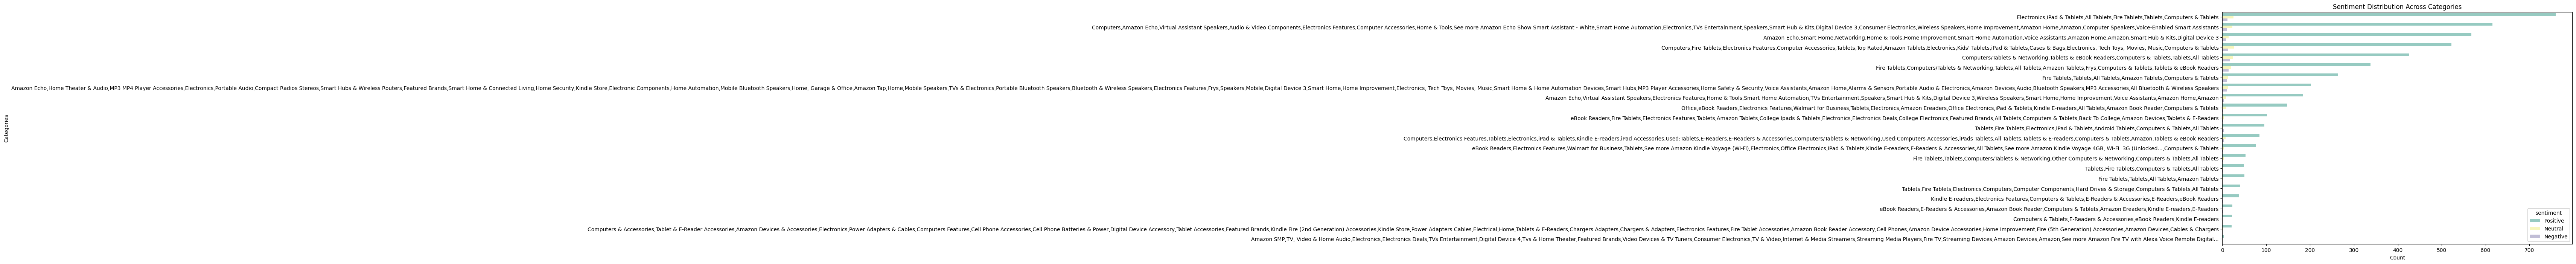

In [46]:
# Sentiment distribution across categories
plt.figure(figsize=(12, 8))
sns.countplot(y='categories', hue='sentiment', data=df, palette='Set3', order=df['categories'].value_counts().index)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2936\2217934195.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.groupby(df['reviews.date'].dt.to_period('M'))['sentiment'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='viridis')


<Figure size 1200x600 with 0 Axes>

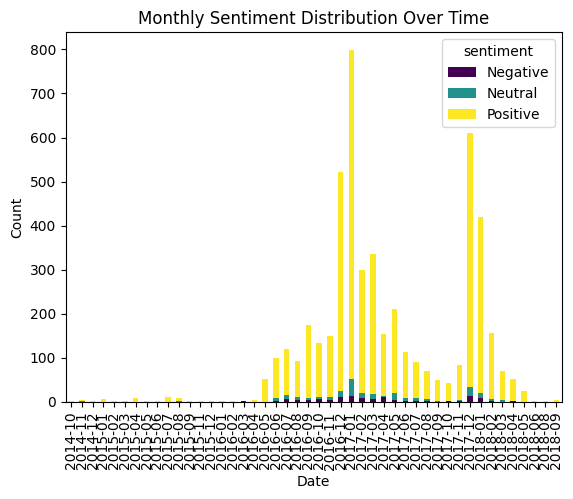

In [47]:
# Reviews date vs sentiment
plt.figure(figsize=(12, 6))
df.groupby(df['reviews.date'].dt.to_period('M'))['sentiment'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Monthly Sentiment Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

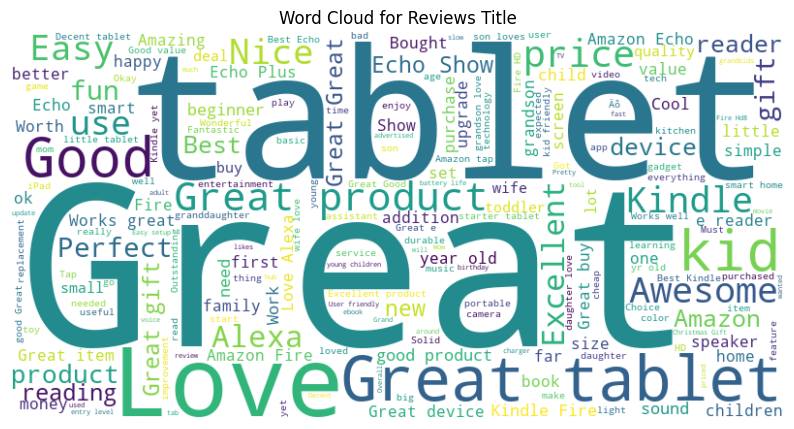

In [48]:
# Reviews title word cloud
from wordcloud import WordCloud

# Combine all titles into one string
title_text = ' '.join(df['reviews.title'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews Title')
plt.show()

#### cleaning the review.text and replacing the null value with a place holder

In [49]:
nltk.download('punkt')

# Initialize Porter Stemmer
porter = PorterStemmer()

def clean_text(text):
    # Remove non-alphabetic characters, except spaces and square brackets
    text = re.sub(r"[^\w\s\[\]]", '', text)
    # Remove square brackets but keep the words inside them
    text = re.sub(r"\[|\]", '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize by word
    tokens = word_tokenize(text)
    # Apply Porter stemming
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def preprocess_data(df, fill_strategy='placeholder'):
    # Identify Null Values
    null_values = df.isnull().sum()
    columns_with_null = null_values[null_values > 0]
    print("Columns with null values:\n", columns_with_null)

    # Handle null values based on the chosen strategy
    if fill_strategy == 'drop':
        df = df.dropna(subset=['reviews.title']).copy()
    elif fill_strategy == 'placeholder':
        df['reviews.title'] = df['reviews.title'].fillna('no review')
    elif fill_strategy == 'summary':
        summary_text = "no specific review provided"
        df['reviews.title'] = df['reviews.title'].fillna(summary_text)

    # Clean reviews.text
    df['cleaned_reviews'] = df['reviews.text'].apply(clean_text)

    # Optionally fill or drop null values in other columns, e.g.:
    df['reviews.title'] = df['reviews.title'].fillna('')

    return df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
# Preprocess the datasets
train_df = preprocess_data(train_df,fill_strategy='placeholder')
test_df = preprocess_data(test_df,fill_strategy='placeholder')
validation_df = preprocess_data(validation_df,fill_strategy='placeholder')

# Display the first few cleaned reviews in each dataset
print("Train dataset:\n", train_df[['reviews.text', 'cleaned_reviews']].head())
print("\nTest dataset:\n", test_df[['reviews.text', 'cleaned_reviews']].head())
print("\nValidation dataset:\n", validation_df[['reviews.text', 'cleaned_reviews']].head())


Columns with null values:
 reviews.title    10
dtype: int64
Columns with null values:
 reviews.title    3
dtype: int64
Columns with null values:
 reviews.title    3
dtype: int64
Train dataset:
                                         reviews.text  \
0  Purchased on Black FridayPros - Great Price (e...   
1  I purchased two Amazon in Echo Plus and two do...   
2  Just an average Alexa option. Does show a few ...   
3  very good product. Exactly what I wanted, and ...   
4  This is the 3rd one I've purchased. I've bough...   

                                     cleaned_reviews  
0  purchas on black fridaypro great price even of...  
1  i purchas two amazon in echo plu and two dot p...  
2  just an averag alexa option doe show a few thi...  
3  veri good product exactli what i want and a ve...  
4  thi is the 3rd one ive purchas ive bought one ...  

Test dataset:
                                         reviews.text  \
0  Amazon kindle fire has a lot of free app and c...   
1  The Echo

In [51]:
train_df

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,cleaned_reviews
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,purchas on black fridaypro great price even of...
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,i purchas two amazon in echo plu and two dot p...
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral,just an averag alexa option doe show a few thi...
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,veri good product exactli what i want and a ve...
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,thi is the 3rd one ive purchas ive bought one ...
...,...,...,...,...,...,...,...,...,...
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,Positive,itäô fun for the famili to play with but it ma...
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,Positive,i love the kindl it is a great product it redu...
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",Positive,i wa look for a blutooth speaker to use with m...
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,Positive,thi is the second amazon fire 7 tablet i have ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2936\2829985263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=palette)


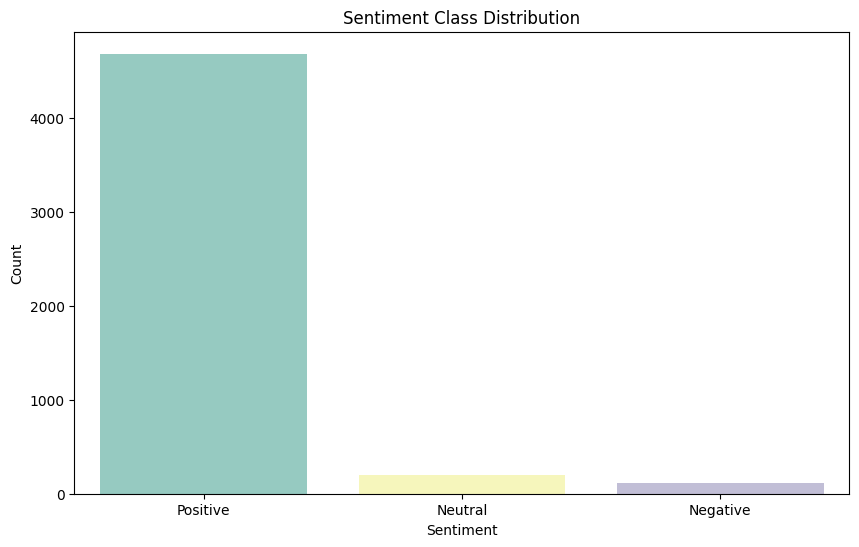

In [52]:
# Visualizing Class Distribution

palette = "Set3"
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette=palette)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2936\41733093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=palette)


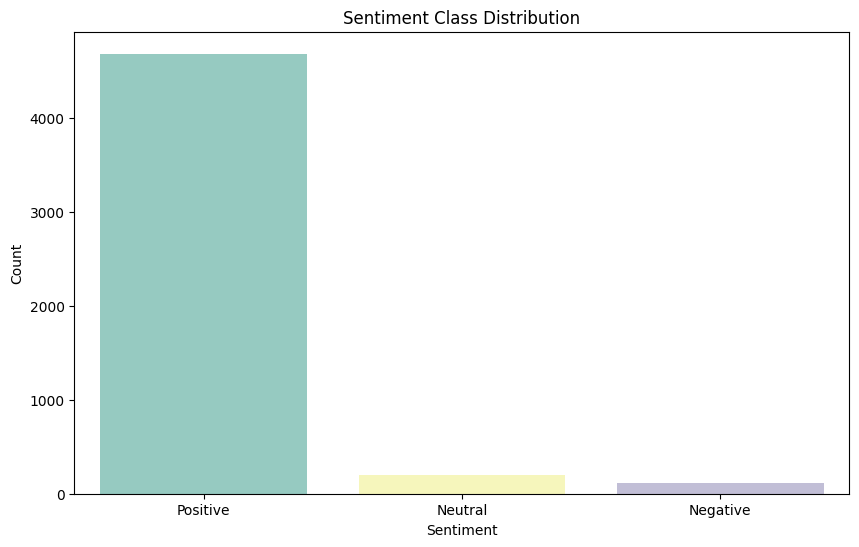

In [53]:
palette = "Set3"
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette=palette)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Minimum Review Length: 1
Maximum Review Length: 1539
Average Review Length: 30.95


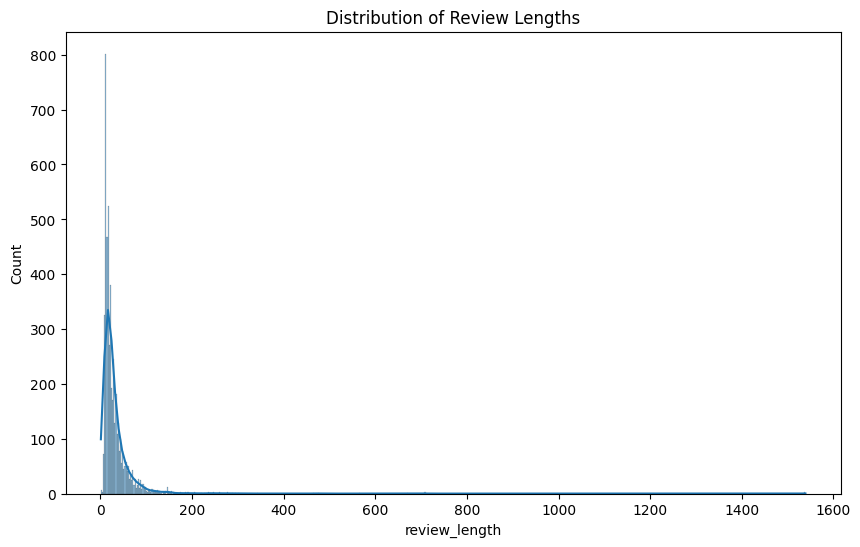

In [54]:
# Examine Review length
import numpy as np
df['review_length'] = df['reviews.text'].apply(lambda x: len(str(x).split()))
# Print minimum, maximum, and average review length
min_length = np.min(df['review_length'])
max_length = np.max(df['review_length'])
avg_length = np.mean(df['review_length'])

print(f"Minimum Review Length: {min_length}")
print(f"Maximum Review Length: {max_length}")
print(f"Average Review Length: {avg_length:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2936\3833903417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set3')


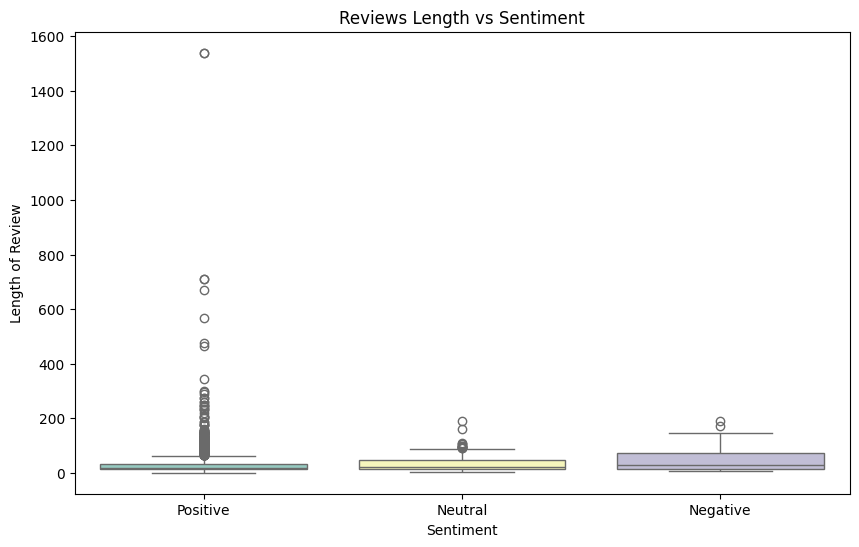

In [55]:
# Reviews length vs sentiment

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set3')
plt.title('Reviews Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Review')
plt.show()

### Feature Engineering:

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X_train_tfidf = tfidf.fit_transform(train_df['cleaned_reviews'].fillna(''))
X_val_tfidf = tfidf.transform(validation_df['cleaned_reviews'].fillna(''))

In [57]:
label_encoder = LabelEncoder()
train_df['encoded_sentiment'] = label_encoder.fit_transform(train_df['sentiment'])
validation_df['encoded_sentiment'] = label_encoder.transform(validation_df['sentiment'])


### Tackling Class Imbalance:

Class Counts before random over sampler:
sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2936\2659608721.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=train_df, palette='Set3')


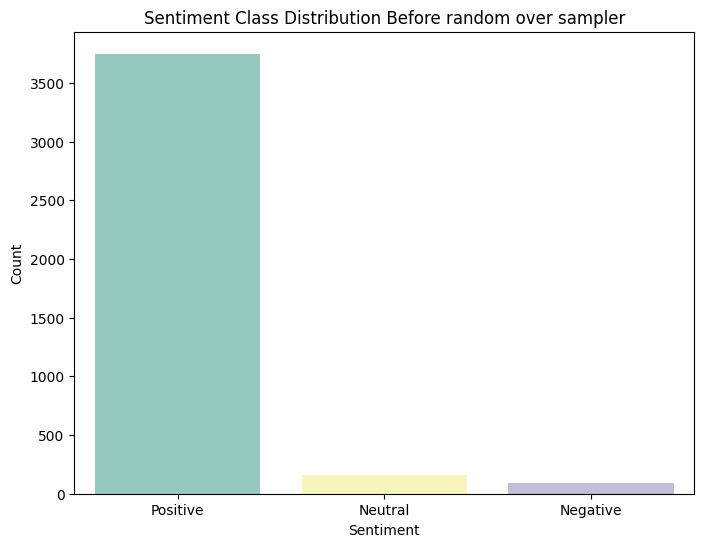

In [58]:
# Class Distribution before SMOTE
class_counts_before = train_df['sentiment'].value_counts()
print("Class Counts before random over sampler:")
print(class_counts_before)
print()

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_df, palette='Set3')
plt.title('Sentiment Class Distribution Before random over sampler')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Interpretation -

  From  visual representation of the class distribution, it is providing insights into any potential class imbalance in our sentiment dataset

In [59]:
# Handling Class Imbalance with RandomOverSampler
oversampler = RandomOverSampler()
X_train_tfidf_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, train_df['sentiment'])



In [60]:
# Display class counts before and after oversampling
class_counts_before = train_df['sentiment'].value_counts()
class_counts_after = pd.Series(y_train_resampled).value_counts()

print("Class Counts before Random Over Sampling:")
print(class_counts_before)
print()

print("Class Counts after Random Over Sampling:")
print(class_counts_after)
print()


Class Counts before Random Over Sampling:
sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64

Class Counts after Random Over Sampling:
sentiment
Positive    3749
Neutral     3749
Negative    3749
Name: count, dtype: int64



## Model Selection and Advanced Techniques

### Multi-class SVM and Neural Nets:


#### SVM classifier

In [61]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf_resampled, y_train_resampled)

# Evaluate on validation set
y_val_pred = svm_classifier.predict(X_val_tfidf)
print("Classification Report for SVM on Validation Data:")
print(classification_report(validation_df['sentiment'], y_val_pred))


Classification Report for SVM on Validation Data:
              precision    recall  f1-score   support

    Negative       0.61      0.46      0.52        24
     Neutral       0.40      0.51      0.45        39
    Positive       0.97      0.97      0.97       937

    accuracy                           0.94      1000
   macro avg       0.66      0.65      0.65      1000
weighted avg       0.94      0.94      0.94      1000



Interpretation - 

Using SVM classifier we found that accuracy reached to  94%, but will will try other models to improve the accuracy 

The Positive class shows very high precision, recall, and F1-score, suggesting that the model performs exceptionally well for this class. However, the Negative and Neutral classes have lower metrics, indicating room for improvement, especially in terms of precision and recall.

In [62]:
# Print some test predictions

X_test_tfidf = tfidf.transform(test_df['cleaned_reviews'].fillna(''))
test_predictions = svm_classifier.predict(X_test_tfidf)

for review, sentiment in zip(test_df['reviews.text'].head(), test_predictions[:5]):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: Amazon kindle fire has a lot of free app and can be used by any one that wants to get online anywhere
Predicted Sentiment: Positive

Review: The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7" screen. Bright vibrant display. Rich clear sound. Works great with Arlo security cameras. Excellent smart home addition. Just hope Google and Amazon start playing nice with each other soon so youtube will work again.
Predicted Sentiment: Positive

Review: Great value from Best Buy. Bought at Christmas sale.
Predicted Sentiment: Positive

Review: I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it to take photos. It is small and be taken easily. I would recommend it to anyone .
Predicted Sentiment: Positive

Review: This is a fantastic item & the person I bought it for loves it.
Predicted Sentiment: Positive



### Ensemble Techniques

#### Using ensemble methods such as XGBoost combined with Naive Bayes:

In [63]:
nb_classifier = MultinomialNB()
xgb_classifier = xgb.XGBClassifier()


In [64]:
ensemble_classifier = VotingClassifier(estimators=[('nb', nb_classifier), ('xgb', xgb_classifier)], voting='soft')
ensemble_classifier.fit(X_train_tfidf_resampled, y_train_resampled)


VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [65]:
y_val_pred_ensemble = ensemble_classifier.predict(X_val_tfidf)
print("Classification Report for Ensemble on Validation Data:")
print(classification_report(validation_df['sentiment'], y_val_pred_ensemble))


Classification Report for Ensemble on Validation Data:
              precision    recall  f1-score   support

    Negative       0.67      0.42      0.51        24
     Neutral       0.44      0.36      0.39        39
    Positive       0.97      0.98      0.97       937

    accuracy                           0.94      1000
   macro avg       0.69      0.59      0.63      1000
weighted avg       0.94      0.94      0.94      1000



Interpretation

1. Negative and Neutral Classes: These classes have lower precision, recall, and F1-score compared to the Positive class. This suggests that the model's performance is weaker for predicting Negative and Neutral sentiments compared to Positive sentiments.

2. Positive Class: The model shows very high precision, recall, and F1-score for the Positive class, indicating strong performance in predicting Positive sentiments.

3. Accuracy: Overall accuracy of 0.95 indicates that the model performs well across all classes, with 95% correct predictions on the validation data.

4. Macro Avg: Provides the average performance metrics across all classes, giving an overall view of model performance without considering class imbalance.

5. Weighted Avg: Provides the weighted average performance metrics, taking into account the support (number of instances) for each class. This metric is useful when classes are imbalanced.

In [66]:
# Print some test predictions

X_test_tfidf = tfidf.transform(test_df['cleaned_reviews'].fillna(''))
test_predictions = ensemble_classifier.predict(X_test_tfidf)

for review, sentiment in zip(test_df['reviews.text'].head(), test_predictions[:5]):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: Amazon kindle fire has a lot of free app and can be used by any one that wants to get online anywhere
Predicted Sentiment: Positive

Review: The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7" screen. Bright vibrant display. Rich clear sound. Works great with Arlo security cameras. Excellent smart home addition. Just hope Google and Amazon start playing nice with each other soon so youtube will work again.
Predicted Sentiment: Positive

Review: Great value from Best Buy. Bought at Christmas sale.
Predicted Sentiment: Positive

Review: I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it to take photos. It is small and be taken easily. I would recommend it to anyone .
Predicted Sentiment: Positive

Review: This is a fantastic item & the person I bought it for loves it.
Predicted Sentiment: Positive



### LSTM Implementation

#### Feature Engineering

In [67]:
# Tokenizer and Padding for LSTM
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['cleaned_reviews'])

In [68]:
# padding

maxlen = 100  # Adjust maxlen based on your dataset
X_train_sequences = tokenizer.texts_to_sequences(train_df['cleaned_reviews'])
X_val_sequences = tokenizer.texts_to_sequences(validation_df['cleaned_reviews'])
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen)
X_val_padded = pad_sequences(X_val_sequences, maxlen=maxlen)

# Oversample for padded sequences using RandomOverSampler
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_padded, train_df['encoded_sentiment'])


In [69]:
# Display class counts before and after oversampling
class_counts_before = train_df['encoded_sentiment'].value_counts()
class_counts_after = pd.Series(y_train_resampled).value_counts()
print(class_counts_after)
print(class_counts_before)

encoded_sentiment
2    3749
1    3749
0    3749
Name: count, dtype: int64
encoded_sentiment
2    3749
1     158
0      93
Name: count, dtype: int64


### Define LSTM model

In [70]:
model1 = Sequential()
model1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100))
model1.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model1.add(Dense(3, activation='softmax'))  # Adjust output dimension based on the number of classes

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [71]:
# Train LSTM Model 1
history1 = model1.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_val_padded, validation_df['encoded_sentiment']))

# Evaluate LSTM Model 1
loss1, accuracy1 = model1.evaluate(X_val_padded, validation_df['encoded_sentiment'])
print(f'LSTM Model 1 - Validation accuracy: {accuracy1}')


Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.7130 - loss: 0.6580 - val_accuracy: 0.9170 - val_loss: 0.2882
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9880 - loss: 0.0488 - val_accuracy: 0.9430 - val_loss: 0.2614
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9962 - loss: 0.0178 - val_accuracy: 0.9340 - val_loss: 0.3268
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9966 - loss: 0.0125 - val_accuracy: 0.9270 - val_loss: 0.3736
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9988 - loss: 0.0041 - val_accuracy: 0.9290 - val_loss: 0.3822
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9280 - val_loss: 0.3826
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9360 - val_loss: 0.3848
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9984 - loss: 0.0057 - 

Interpretation- 
 
The final evaluation on the validation set shows an accuracy of 0.9418 and a loss of 0.3309. The high training accuracy and lower validation accuracy, along with the increasing validation loss over epochs, indicate that the model has likely overfit to the training data. This is evidenced by the large gap between the near-perfect training accuracy and the relatively lower validation accuracy and higher validation loss.

Overall, while the model has learned the training data very well, its generalization to new, unseen data (validation set) is less optimal, suggesting that further regularization techniques or early stopping could help prevent overfitting and improve model performance on the validation set.

### Optimization:

Using Bidirectional LSTM architecture, which is effective for capturing contextual information from both past and future directions of the input sequence.

To address the over fitting droping the neurons and adding early stopping 

In [72]:
# Define the model
model2 = Sequential()
model2.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100))
model2.add(Bidirectional(LSTM(units=64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model2.add(Bidirectional(LSTM(units=32, dropout=0.3, recurrent_dropout=0.3)))
model2.add(Dense(units=3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model2.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, validation_data=(X_val_padded, validation_df['encoded_sentiment']))
val_loss, val_accuracy = model2.evaluate(X_val_padded, validation_df['encoded_sentiment'])
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 33s 142ms/step - accuracy: 0.5786 - loss: 0.8623 - val_accuracy: 0.8610 - val_loss: 0.4531
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.9662 - loss: 0.1589 - val_accuracy: 0.9350 - val_loss: 0.2849
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.9900 - loss: 0.0777 - val_accuracy: 0.9210 - val_loss: 0.3437
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.9936 - loss: 0.0567 - val_accuracy: 0.9370 - val_loss: 0.3096
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.9952 - loss: 0.0459 - val_accuracy: 0.9350 - val_loss: 0.3161
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.9911 - loss: 0.0563 - val_accuracy: 0.9160 - val_loss: 0.3652
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.9978 - loss: 0.0373 - val_accuracy: 0.9340 - val_loss: 0.3321
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 132ms/step - accuracy: 0.9981 - loss: 0

In [73]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.744643,0.584788,0.861,0.453050
1,0.975549,0.128943,0.935,0.284930
2,0.990931,0.069949,0.921,0.343749
3,0.993243,0.058344,0.937,0.309647
4,0.996088,0.043126,0.935,0.316084
5,0.993154,0.051109,0.916,0.365192
6,0.997422,0.036789,0.934,0.332077
7,0.998222,0.031154,0.932,0.345378
8,0.998222,0.029630,0.927,0.361389
9,0.999022,0.027832,0.946,0.289228


Finding: 

* The training accuracy increases significantly and stabilizes towards the end of the epochs, reaching nearly perfect accuracy (0.999).

* Validation accuracy shows some fluctuations but generally improves, peaking at 0.946 and then stabilizing

Interpretation

* The model demonstrates high accuracy and low loss on both training and validation sets by the end of the training, indicating effective learning.

* Minor fluctuations in validation accuracy and loss suggest that while the model performs well, there might be slight overfitting or variability in generalization.

* The consistent decrease in training loss and the relatively stable validation metrics towards the end indicate that the dropout and early stopping techniques are likely helping to control overfitting and improve generalization.



In [74]:
# Predict with LSTM Model 2 on Test Data
X_test_sequences = tokenizer.texts_to_sequences(test_df['cleaned_reviews'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen)
test_predictions = model2.predict(X_test_padded)
predicted_labels = test_predictions.argmax(axis=1)

predicted_sentiments = label_encoder.inverse_transform(predicted_labels)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


In [75]:
# Print some test predictions
for review, sentiment in zip(test_df['reviews.text'].head(), predicted_sentiments[:5]):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: Amazon kindle fire has a lot of free app and can be used by any one that wants to get online anywhere
Predicted Sentiment: Positive

Review: The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7" screen. Bright vibrant display. Rich clear sound. Works great with Arlo security cameras. Excellent smart home addition. Just hope Google and Amazon start playing nice with each other soon so youtube will work again.
Predicted Sentiment: Positive

Review: Great value from Best Buy. Bought at Christmas sale.
Predicted Sentiment: Positive

Review: I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it to take photos. It is small and be taken easily. I would recommend it to anyone .
Predicted Sentiment: Positive

Review: This is a fantastic item & the person I bought it for loves it.
Predicted Sentiment: Positive



### Printing  some test predictions for Positive, Neutral and Negative reviews

In [76]:
import random
samples = list(zip(test_df['reviews.text'], predicted_sentiments))

positive_samples = [sample for sample in samples if sample[1] == 'Positive']
neutral_samples = [sample for sample in samples if sample[1] == 'Neutral']
negative_samples = [sample for sample in samples if sample[1] == 'Negative']


def get_random_samples(sample_list, num_samples):
    return random.sample(sample_list, min(len(sample_list), num_samples))


num_samples = 2  


random_positive = get_random_samples(positive_samples, num_samples)
random_neutral = get_random_samples(neutral_samples, num_samples)
random_negative = get_random_samples(negative_samples, num_samples)


random_samples = random_positive + random_neutral + random_negative


for review, sentiment in random_samples:
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")



Review: This product is easy to use and take along with you
Predicted Sentiment: Positive

Review: My wife loves this tablet.Much easier to use than previous 2 tablets that we purchased.
Predicted Sentiment: Positive

Review: Amazon tap is one of my best buys this year so far...The only thing that could make the tap better is an upgrade so you don't have to tap every command....That would make it a 5star device....
Predicted Sentiment: Neutral

Review: It's alright to browse the Internet and watch videos.
Predicted Sentiment: Neutral

Review: hard to use, and does not support Guam. online instructions not clear
Predicted Sentiment: Negative

Review: This is not an upgrade by any means! My three year old kindle outperformed Oasis.Battery life better than a week with the lights on lowest setting Magnetic connector is poorly designed and grows weak Two pieces to keep up with; unsnaps constantly Amazon Customer Services promises it will resolved in an update
Predicted Sentiment: Negative

